In [1]:
require(splines)
require(stats)

Loading required package: splines



In [2]:
activations <- t(read.csv("data/tf_activity/activations.csv", row.names=1))
#activations <- dat[order(dat$temperature, decreasing = FALSE), ]
head(activations)

,AHR,AIRE,AP1,APEX1,AR,ARID4A,ARID4B,ARNT,ARX,ASCL1,⋯,ZNF331,ZNF350,ZNF354C,ZNF362,ZNF382,ZNF384,ZNF436,ZNF699,ZNF76,ZNF91
human_759_L1,0.67627008,1.1627055,5.707020,0.272136586,4.716855,-0.7447058,0.4448113,-0.2206688,1.2596353,0.1293131,⋯,-2.062938,-0.34457461,-0.2630262,0.59802399,-1.1516971,0.9260869,1.1376373,2.337185,0.7043411,-1.0409607
human_j12_L1,1.85235907,2.1440383,5.108610,-0.001887422,5.102747,-0.5543906,0.1685959,0.5161325,1.6554498,0.4924631,⋯,-1.760618,-0.44958932,-0.5314432,1.30651999,-1.2371470,-0.1639048,0.9536692,3.117587,0.9100560,-0.9133224
human_j3_L1,0.51025961,1.0172759,3.644221,-0.344000313,4.751144,0.1398408,0.3225986,-0.3334291,1.0750981,-0.1400602,⋯,-2.295994,-0.19502681,-1.2690388,0.08634817,-0.3444295,-0.8907076,1.2896657,1.299068,1.0678970,-1.3379550
human_j4_L1,0.04831810,0.6770507,4.109690,-0.186377209,4.185399,-0.5530666,0.4286519,-0.2997726,1.8092138,0.6595985,⋯,-2.139637,-0.08521200,-0.9159596,0.71748794,-0.9959501,-0.9426331,1.2371402,2.232823,0.8958876,-1.6055851
human_j6_L1,2.04143066,1.8973564,5.707409,1.053681315,5.672564,-0.1654767,0.4023635,0.3620508,0.9587113,1.2832946,⋯,-1.851868,-0.09633481,-0.6260540,0.36506096,-0.6109608,0.4073422,1.4372751,2.182601,0.7449757,-0.8453445
human_759_L2,0.06959788,0.7247312,3.994979,-0.089913926,4.414277,-0.5820003,0.5647768,-0.5575016,1.6250301,-0.1416416,⋯,-2.149431,-0.44140318,-0.7171661,0.16064742,0.1208465,-0.6699648,1.3579426,2.015566,0.7705942,-1.1618477


In [3]:
annotation <- read.csv("data/tf_activity/annotation.csv", row.names=1)
#activations <- dat[order(dat$temperature, decreasing = FALSE), ]
head(annotation)

,layer,sample_id,psbulk_cells,psbulk_counts,condition,lib_size,log_lib_size,layer_c
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<int>
human_759_L1,L1,human_759,500,1400502,human,2801.004,7.937733,1
human_j12_L1,L1,human_j12,331,1168612,human,3530.550,8.169209,1
human_j3_L1,L1,human_j3,110,536103,human,4873.664,8.491601,1
human_j4_L1,L1,human_j4,238,1038124,human,4361.866,8.380655,1
human_j6_L1,L1,human_j6,134,339404,human,2532.866,7.837107,1
human_759_L2,L2,human_759,406,1962071,human,4832.687,8.483158,2


In [4]:
merge_df <- cbind(annotation, activations)
head(merge_df)

,layer,sample_id,psbulk_cells,psbulk_counts,condition,lib_size,log_lib_size,layer_c,AHR,AIRE,⋯,ZNF331,ZNF350,ZNF354C,ZNF362,ZNF382,ZNF384,ZNF436,ZNF699,ZNF76,ZNF91
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
human_759_L1,L1,human_759,500,1400502,human,2801.004,7.937733,1,0.67627008,1.1627055,⋯,-2.062938,-0.34457461,-0.2630262,0.59802399,-1.1516971,0.9260869,1.1376373,2.337185,0.7043411,-1.0409607
human_j12_L1,L1,human_j12,331,1168612,human,3530.550,8.169209,1,1.85235907,2.1440383,⋯,-1.760618,-0.44958932,-0.5314432,1.30651999,-1.2371470,-0.1639048,0.9536692,3.117587,0.9100560,-0.9133224
human_j3_L1,L1,human_j3,110,536103,human,4873.664,8.491601,1,0.51025961,1.0172759,⋯,-2.295994,-0.19502681,-1.2690388,0.08634817,-0.3444295,-0.8907076,1.2896657,1.299068,1.0678970,-1.3379550
human_j4_L1,L1,human_j4,238,1038124,human,4361.866,8.380655,1,0.04831810,0.6770507,⋯,-2.139637,-0.08521200,-0.9159596,0.71748794,-0.9959501,-0.9426331,1.2371402,2.232823,0.8958876,-1.6055851
human_j6_L1,L1,human_j6,134,339404,human,2532.866,7.837107,1,2.04143066,1.8973564,⋯,-1.851868,-0.09633481,-0.6260540,0.36506096,-0.6109608,0.4073422,1.4372751,2.182601,0.7449757,-0.8453445
human_759_L2,L2,human_759,406,1962071,human,4832.687,8.483158,2,0.06959788,0.7247312,⋯,-2.149431,-0.44140318,-0.7171661,0.16064742,0.1208465,-0.6699648,1.3579426,2.015566,0.7705942,-1.1618477


In [5]:
one <- rep(1, 10)
names(one) <- rep('col', 10)

two <- rep(2, 10)
names(one) <- rep('col', 10)

cbind(one, two)

,one,two
col,1,2
col,1,2
col,1,2
col,1,2
col,1,2
col,1,2
col,1,2
col,1,2
col,1,2
col,1,2


In [6]:
groups <- c('human', 'macaque')

gene_num <- length(colnames(activations))
f_value <- rep(-1.0, gene_num)
names(f_value) <- colnames(activations)
p_value <- rep(-1.0, gene_num)
names(p_value) <- colnames(activations)

for (name in colnames(activations)) {
    comparison_df <- merge_df[(merge_df$condition == groups[1]) | (merge_df$condition == groups[2]), ]
    comparison_df['target'] <- comparison_df[name]
    model <- lm(target ~ sample_id + ns(layer_c, df=3) + condition:ns(layer_c, df=3), data=comparison_df)
    anova_res <- anova(model)
    p_value[name] <- anova_res['ns(layer_c, df = 3):condition', 'Pr(>F)']
    f_value[name] <- anova_res['ns(layer_c, df = 3):condition', 'F value']
}

res_df <- cbind(p_value, f_value)
colnames(res_df) <- c('p_value', 'F')

write.csv(res_df, file='data/tf_activity/activation_comp_human_macaque.csv')

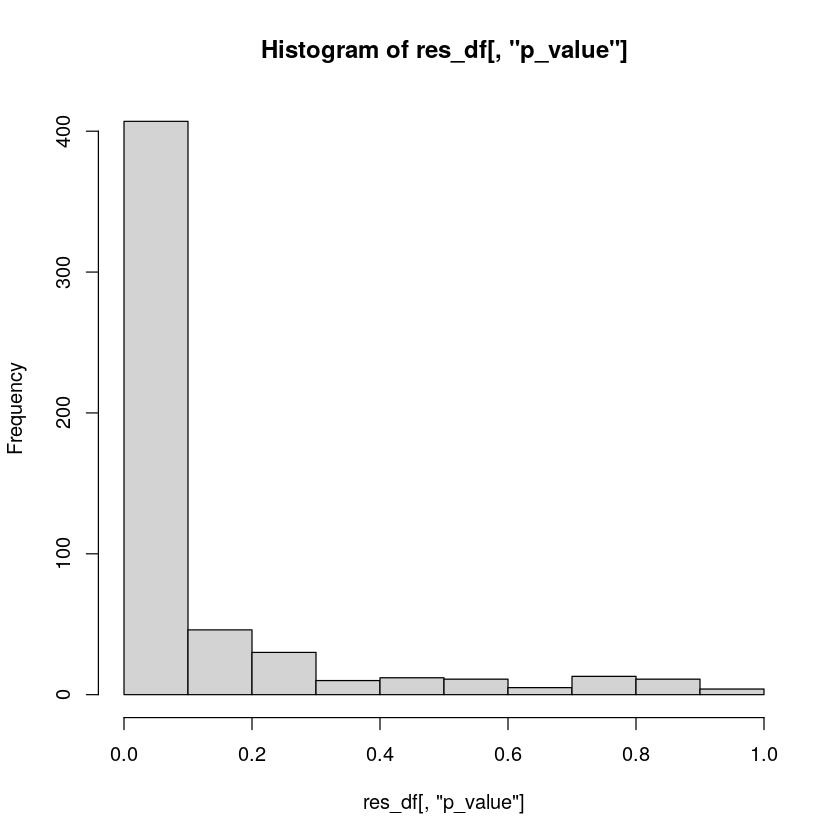

In [7]:
hist(res_df[,'p_value'])

In [8]:
groups <- c('human', 'chimp')

gene_num <- length(colnames(activations))
f_value <- rep(-1.0, gene_num)
names(f_value) <- colnames(activations)
p_value <- rep(-1.0, gene_num)
names(p_value) <- colnames(activations)

for (name in colnames(activations)) {
    comparison_df <- merge_df[(merge_df$condition == groups[1]) | (merge_df$condition == groups[2]), ]
    comparison_df['target'] <- comparison_df[name]
    model <- lm(target ~ sample_id + ns(layer_c, df=3) + condition:ns(layer_c, df=3), data=comparison_df)
    anova_res <- anova(model)
    p_value[name] <- anova_res['ns(layer_c, df = 3):condition', 'Pr(>F)']
    f_value[name] <- anova_res['ns(layer_c, df = 3):condition', 'F value']
}

res_df <- cbind(p_value, f_value)
colnames(res_df) <- c('p_value', 'F')

write.csv(res_df, file='data/tf_activity/activation_comp_human_chimp.csv')

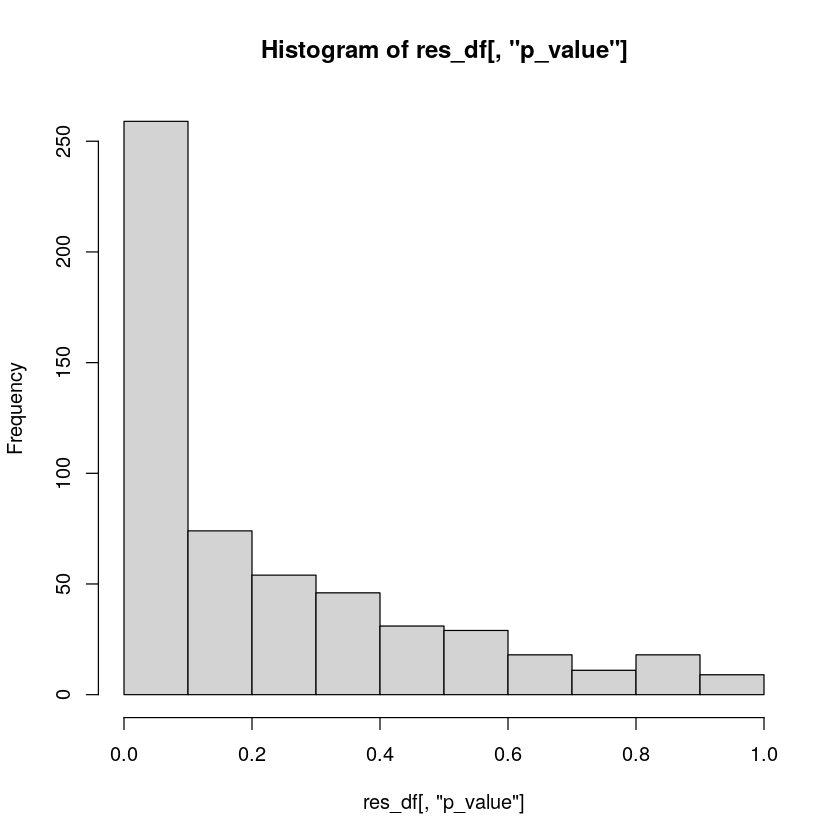

In [9]:
hist(res_df[,'p_value'])

In [10]:
groups <- c('chimp', 'macaque')

gene_num <- length(colnames(activations))
f_value <- rep(-1.0, gene_num)
names(f_value) <- colnames(activations)
p_value <- rep(-1.0, gene_num)
names(p_value) <- colnames(activations)

for (name in colnames(activations)) {
    comparison_df <- merge_df[(merge_df$condition == groups[1]) | (merge_df$condition == groups[2]), ]
    comparison_df['target'] <- comparison_df[name]
    model <- lm(target ~ sample_id + ns(layer_c, df=3) + condition:ns(layer_c, df=3), data=comparison_df)
    anova_res <- anova(model)
    p_value[name] <- anova_res['ns(layer_c, df = 3):condition', 'Pr(>F)']
    f_value[name] <- anova_res['ns(layer_c, df = 3):condition', 'F value']
}

res_df <- cbind(p_value, f_value)
colnames(res_df) <- c('p_value', 'F')

write.csv(res_df, file='data/tf_activity/activation_comp_chimp_macaque.csv')

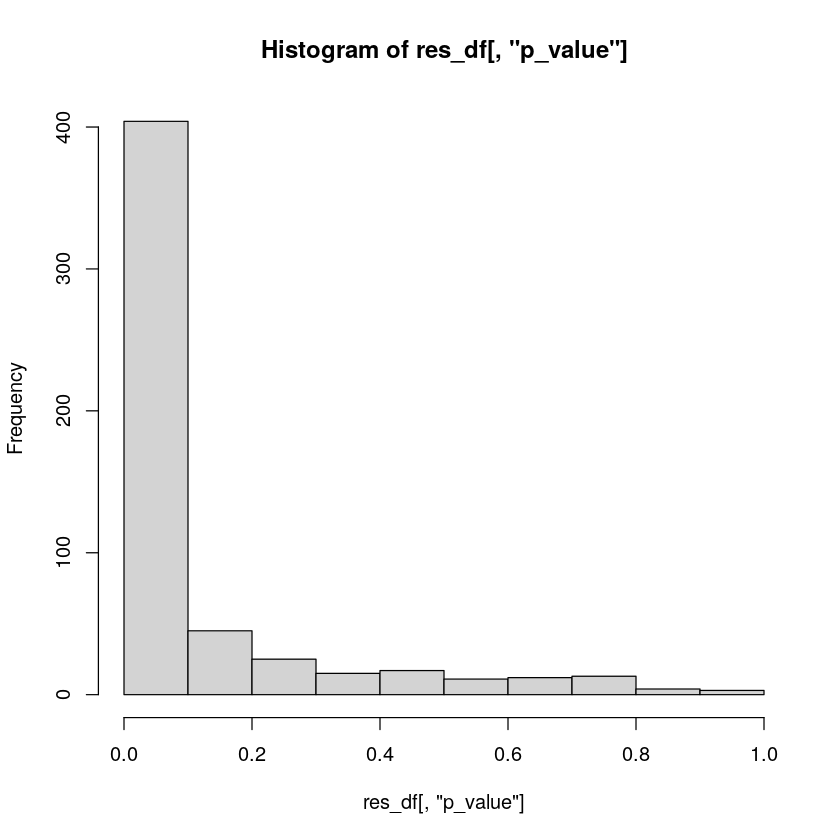

In [11]:
hist(res_df[,'p_value'])